In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = {'age' : [22,25,47,52,46,56,55,60,62,61,18,28,27,29,49,55,25,58,19,18,21,26,40,45,50,54,23],
        'bought_insurance' : [0,0,1,0,1,1,0,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,1,0]
       }

In [3]:
df=pd.DataFrame(data, columns=['age','bought_insurance'])
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


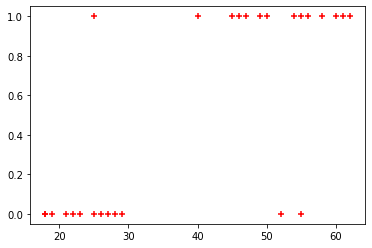

In [4]:
plt.scatter(df.age,df.bought_insurance,color='red',marker='+')

In [5]:
X=df.drop('bought_insurance',axis='columns')
X

,age
0,22
1,25
2,47
3,52
4,46
5,56
6,55
7,60
8,62
9,61


In [6]:
y=df.bought_insurance

In [7]:
y

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
Name: bought_insurance, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
X_train

,age
24,50
1,25
4,46
5,56
2,47
15,55
22,40
3,52
25,54
23,45


In [11]:
y_train

24    1
1     0
4     1
5     1
2     1
15    1
22    1
3     0
25    1
23    1
18    0
26    0
20    0
7     1
10    0
14    1
19    0
6     0
Name: bought_insurance, dtype: int64

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [14]:
prediction=reg.predict(X)

In [15]:
prediction

array([0.10010227, 0.17115409, 0.69220073, 0.81062042, 0.66851679,
       0.90535618, 0.88167224, 1.00009193, 1.04745981, 1.02377587,
       0.00536652, 0.2422059 , 0.21852197, 0.26588984, 0.73956861,
       0.88167224, 0.17115409, 0.95272406, 0.02905046, 0.00536652,
       0.07641834, 0.19483803, 0.52641316, 0.64483286, 0.76325255,
       0.8579883 , 0.12378621])

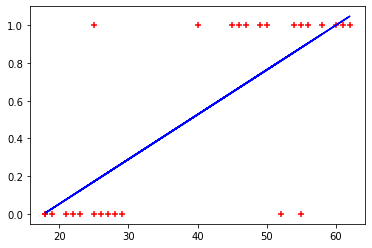

In [16]:
plt.scatter(df.age,df.bought_insurance,color='red',marker='+')
plt.plot(X,prediction,'b')

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model=LogisticRegression()
model.fit(X_train,y_train);


In [19]:
prediction=model.predict(X_test)

In [20]:
prediction

array([1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [21]:
y_test

8     1
13    0
9     1
21    0
0     0
11    0
16    1
17    1
12    0
Name: bought_insurance, dtype: int64

In [22]:
y_predict=model.predict([[59]])
y_predict

array([1], dtype=int64)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print(confusion_matrix(y_test,prediction))

[[5 0]
 [1 3]]


In [25]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.75      0.86         4

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9



In [26]:
# k-means clusteringh

In [27]:
df=pd.read_csv('income.csv')

In [28]:
df

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [29]:
df.shape

(22, 3)

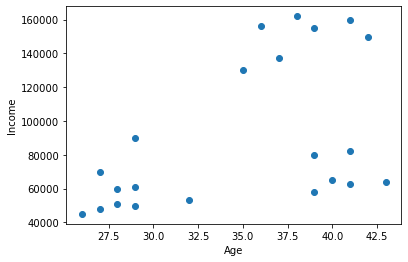

In [32]:
plt.xlabel('Age')
plt.ylabel('Income')
plt.scatter(df['Age'],df['Income'])

In [33]:
from sklearn.cluster import KMeans

In [34]:
km=KMeans(n_clusters=3)

In [35]:
X=df.drop('Name',axis='columns')

In [36]:
X

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [37]:
km.fit(X);

In [39]:
y_predict=km.predict(X)
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [40]:
df['cluster']=y_predict
df

,Name,Age,Income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [41]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [42]:
df0=df[df.cluster==0]
df0

,Name,Age,Income,cluster
2,Mohan,29,61000,0
3,Ismail,28,60000,0
11,Tom,26,45000,0
12,Arnold,27,48000,0
13,Jared,28,51000,0
14,Stark,29,49500,0
15,Ranbir,32,53000,0
16,Dipika,40,65000,0
17,Priyanka,41,63000,0
18,Nick,43,64000,0


In [43]:
df1=df[df.cluster==1]
df1

,Name,Age,Income,cluster
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1
10,Donald,37,137000,1


In [44]:
df2=df[df.cluster==2]
df2

,Name,Age,Income,cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
19,Alia,39,80000,2
20,Sid,41,82000,2


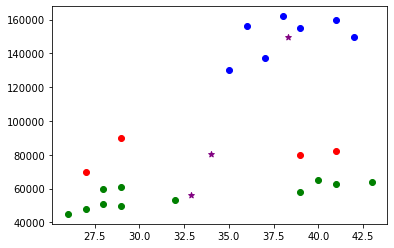

In [48]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
plt.scatter(df0['Age'],df0['Income'],color='green')
plt.scatter(df1['Age'],df1['Income'],color='blue')
plt.scatter(df2['Age'],df2['Income'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*', label='centrod')

In [49]:
new=km.predict([[41,50000]])

In [50]:
new

array([0])

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler=MinMaxScaler()
df['Income']=scaler.fit_transform(df[['Income']])
df['Age']=scaler.fit_transform(df[['Age']])
df

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [53]:
X=df.values[:,1:3]

In [54]:
km=KMeans(n_clusters=3)
km.fit(X);

In [55]:
y_predict=km.fit_predict(X)
y_predict


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [56]:
df['cluster']=y_predict
df

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


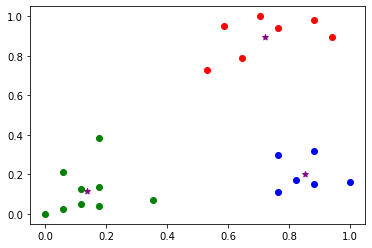

In [57]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
plt.scatter(df0['Age'],df0['Income'],color='green')
plt.scatter(df1['Age'],df1['Income'],color='red')
plt.scatter(df2['Age'],df2['Income'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*', label='centrod')
